<a href="https://colab.research.google.com/github/OumaymaRedissi/IAA-DM-Labs/blob/main/IAA_ML_ModelProcessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Model Processing**

## Tâches 

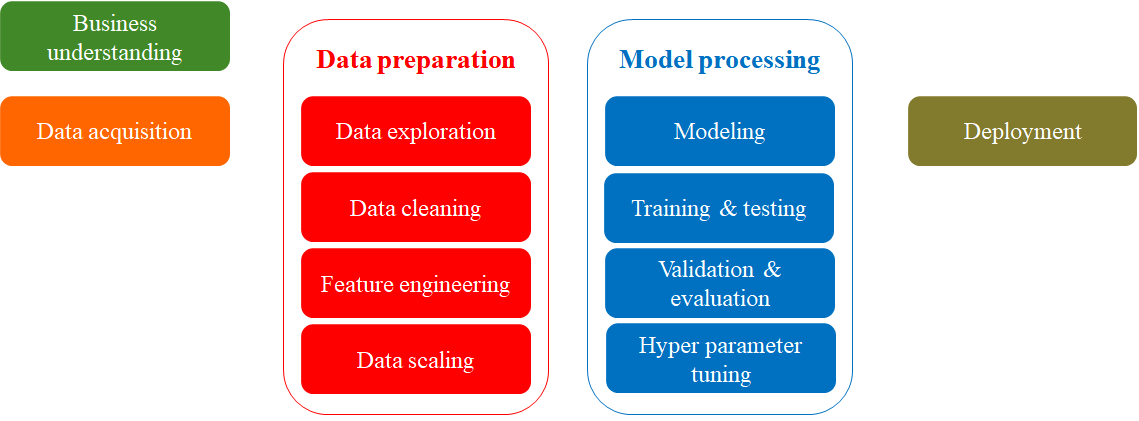

In [ ]:
# JS code pour garder colab actif à ajouter dans la console, une fois que le bouton connxion a été inspecté
function ConnectButton(){
    console.log("Connect pushed"); 
    document.querySelector("#top-toolbar > colab-connect-button").shadowRoot.querySelector("#connect").click() 
}
setInterval(ConnectButton,60000);

Le cas étudié est disponible sur ce [lien_github](https://github.com/urwithajit9/ClaMP)

# **1. Machine Learning - Multiple classifieurs** 

Choix du meilleur


## Importation des données

In [ ]:
  from google.colab import drive
drive.mount('/google_drive')
%cd /google_drive

import pandas as pd

data = pd.read_csv('/google_drive/MyDrive/dataset_Malware.csv')

Mounted at /google_drive
/google_drive


## Répartition des données 

In [ ]:
features = data.drop(['Malware', 'Name'],axis=1)

label = data.Malware

from sklearn.model_selection import train_test_split

# Répartition des données en partie d'apprentissage et partie de test et ce au niveau des features et des labels 

X_train, X_test, y_train, y_test = train_test_split(features,label, test_size=0.2, random_state=0) 

# random_state doit prendre une valeur exacte pour avoir à chaque foi sla même répartition (split)



## Evaluation de plusieurs classifieurs 

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

RF    = RandomForestClassifier()
KNN   = KNeighborsClassifier() 
DT    = DecisionTreeClassifier()
SVM   = SVC()
LR    = LogisticRegression(solver="liblinear")


models =[RF, KNN, DT, SVM, LR]

for model in models:
  model.fit(X_train, y_train)
  print(f"************* {model} ***************")
  print("------------------------")
  print('Score Train : ',"{:.2%}".format(model.score(X_train, y_train)))
  print('Score Test  : ',"{:.2%}".format(model.score(X_test, y_test)))
  print("------------------------")



************* RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False) ***************
------------------------
Score Train :  99.99%
Score Test  :  99.18%
------------------------
************* KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform') ***************
------------------------
Score Train :  98.85%
Score Test  :  98.42%
------------------------
************* Deci

# **2. Machine Learning - Validation**


## Importation des données

In [ ]:
from google.colab import drive
drive.mount('/google_drive')
%cd /google_drive

import pandas as pd

data = pd.read_csv('/google_drive/MyDrive/dataset_Malware.csv')

Drive already mounted at /google_drive; to attempt to forcibly remount, call drive.mount("/google_drive", force_remount=True).
/google_drive


## Répartition des données 

In [ ]:
features = data.drop(['Malware', 'Name'],axis=1)

label = data.Malware

from sklearn.model_selection import train_test_split

# Répartition des données en partie d'apprentissage et partie de test et ce au niveau des features et des labels 

X_train, X_test, y_train, y_test = train_test_split(features,label, test_size=0.2, random_state=0) 

# random_state doit prendre une valeur exacte pour avoir à chaque foi sla même répartition (split)



## Cross Validation 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier


#création d'une instance de la classe
KNN = KNeighborsClassifier()

# Exécution de l'instance 
model = KNN.fit(X_train,y_train)
print('Score Train : ',"{:.2%}".format(model.score(X_train, y_train)))
print('Score Test  : ',"{:.2%}".format(model.score(X_test, y_test)))


Score Train :  98.85%
Score Test  :  98.42%


In [ ]:
from sklearn import model_selection
# Evaluation en validation croisée : 10 cross-validations
succes = model_selection.cross_val_score(KNN,features,label,cv=10,scoring='accuracy')
print(succes)
print("{:.2%}".format(succes.mean()))


[0.98267074 0.98674146 0.98776135 0.98419174 0.98827129 0.98521163
 0.98317185 0.9836818  0.98572157 0.98317185]
98.51%


## Grid Search - Hyperparmeters Tuning

In [ ]:
# Pour énumérer les valeurs des hyperparamètres à évaluer à chaque fois 

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

svm = SVC() #C , kernel et gamma

params_grid = {
          "C": [1, 10],
          "kernel": ['linear', 'rbf', 'poly'],
          "gamma": [0.01, 0.1]
        }

grid = GridSearchCV(svm, params_grid , scoring="accuracy", cv=5)
grid.fit(X_train, y_train)






GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 10], 'gamma': [0.01, 0.1],
                         'kernel': ['linear', 'rbf', 'poly']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [ ]:
grid.best_score_

In [ ]:
grid.best_params_

In [ ]:
grid.best_estimator_

# **3. Machine Learning - Ensembling**

## Model

In [ ]:
import pandas as pd
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data',
                                      names = ['vente','maintenance','portes', 'personnes', 'coffre', 'securite', 'classe'] )


# LabelEncoder 

from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()

for column in data.columns:
  data[column] = LE.fit_transform(data[column])

# Répartition des données 

features = data.drop(['classe'],axis=1)

label = data.classe

from sklearn.model_selection import train_test_split

# Répartition des données en partie d'apprentissage et partie de test et ce au niveau des features et des labels 

X_train, X_test, y_train, y_test = train_test_split(features,label, test_size=0.2, random_state=0) 

data


,vente,maintenance,portes,personnes,coffre,securite,classe
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2
...,...,...,...,...,...,...,...
1723,1,1,3,2,1,2,1
1724,1,1,3,2,1,0,3
1725,1,1,3,2,0,1,2
1726,1,1,3,2,0,2,1


## Types 

<img src="https://machinelearningknowledge.ai/wp-content/uploads/2019/12/Ensemble-Learning-Intuition.gif">

<img src ="https://machinelearningknowledge.ai/wp-content/uploads/2019/12/Bagging-Bootstrap-Aggregation.gif">

<img src ="https://machinelearningknowledge.ai/wp-content/uploads/2019/12/Boosting.gif">

## Voting




In [ ]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier

SVM = SVC()
KNN = KNeighborsClassifier()
DT  = DecisionTreeClassifier()

models = [('svm',SVM),('knn',KNN),('tree',DT)]
voting_result = VotingClassifier(estimators=models)

In [ ]:
voting_result.fit(X_train, y_train)
print('Score Train : ',"{:.2%}".format(voting_result.score(X_train, y_train)))
print('Score Train : ',"{:.2%}".format(voting_result.score(X_test, y_test)))

## Bagging



In [ ]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier()

RF.fit(X_train, y_train)

print('Score Train : ',"{:.2%}".format(RF.score(X_train, y_train)))
print('Score Train : ',"{:.2%}".format(RF.score(X_test, y_test)))

## Boosting


In [ ]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

ada_boost = AdaBoostClassifier()
GB        = GradientBoostingClassifier()

ada_boost.fit(X_train, y_train)
GB.fit(X_train, y_train)
print('***************** AdaBoost  *****************')
print('Score Train : ',"{:.2%}".format(ada_boost.score(X_train, y_train)))
print('Score Train : ',"{:.2%}".format(ada_boost.score(X_test, y_test)))
print('***************** Gradient Boost  *****************')
print('Score Train : ',"{:.2%}".format(GB.score(X_train, y_train)))
print('Score Train : ',"{:.2%}".format(GB.score(X_test, y_test)))

# Références


1. Lien dataset : [dataset_Malware](https://drive.google.com/file/d/1zYMTg1C1KihJEaKvI8C5unE09rAjoniv/view?usp=sharing)
